# Problem statement

Like most hotels, hotel H, a hotel located in Lisbon, Portugal, a
member of the independent hotel chain C, uses a hospitality
standard market segmentation based on the origin of the customer.
However, A, the new marketing manager of hotel H, recognized
that this type of segmentation, as is today well-known (3, 4), is not
useful for the hotel marketing department.
The name of the individual and the company name is anonymized to
protect confidentiality. The referenced data are real.

# Key tasks

Explore the data and identify the variables that should be used to
segment customers
2. Use K-Means clustering to identify customers segments
1. Justify your selection of K (taking into consideration the business use)
2. Use PCA to reduce dimensionality and speed-up model development
3. Suggest business applications for the findings

# Variables:
        
- ID: Customer ID
- Nationality: Nationality of the customer in ISO 3166-1 (Alpha 3) format
- Age: Age of the customer
- DaysSinceCreation: Number of elapsed days since the customer was created
- NameHash: Hash of the customer name
- DocIDHash: Hash of the customer personal document identification number (usually passport or ID card)
- AverageLeadTime: Average number of days before arrival date the customer makes bookings
- LodgingRevenue: Total amount of lodging revenue paid by the customer so far
- OtherRevenue: Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far
- BookingsCanceled: Number of bookings the customer made but ubsequently canceled
- BookingsNoShowed: Number of bookings the customer made but subsequently made a "no-show"
- BookingsCheckedin: Number of bookings the customer made, which actually ended up staying
- PersonNights: Total person/nights the customer has stayed at the hotel so far.
- RoomNights: Total of room/nights the customer has stayed at the hotel so far.
- MarketSegment: Current market segment of the customer
- SRHighFloor: Indication if the customer usually asks for a room in a higher floor (0: No, 1: Yes)
- SRLowFloor: Indication if the customer usually asks for a room in a lower floor (0: No, 1: Yes)
- SRAccessibleRoom: Indication if the customer usually asks for an accessible room (0: No, 1: Yes)
- SRMediumFloor: Indication if the customer usually asks for a room in a middle floor (0: No, 1: Yes)
- SRBathtub Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes)
- SRShower: Indication if the customer usually asks for a room with a shower (0: No, 1: Yes)
- SRCrib: Indication if the customer usually asks for a crib (0: No, 1: Yes)
- SRKingSizeBed: Indication if the customer usually asks for a room with a king size bed (0: No, 1: Yes)
- SRTwinBed Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes)
- SRNearElevator: Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes)
- SRAwayFromElevator: Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes)
- SRNoAlcoholInMiniBar: Indication if the customer usually asks for a room with no alcohol in the mini bar (0: No, 1: Yes)
- SRQuietRoom: Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes)

## Importing libraries

In [348]:
import os
import csv
import math
import collections
import numpy as np
import pandas as pd
import seaborn as sns
from plotly import tools
import plotly.offline as py
import category_encoders as ce
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, silhouette_samples

In [298]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1GvWonf86zpn6TAUu-W57tw9V7lhJpFXq', sep=";")

In [299]:
# loading and reading data

df.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [300]:
# getting data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111733 entries, 0 to 111732
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    111733 non-null  int64  
 1   Nationality           111733 non-null  object 
 2   Age                   107561 non-null  float64
 3   DaysSinceCreation     111733 non-null  int64  
 4   NameHash              111733 non-null  object 
 5   DocIDHash             110732 non-null  object 
 6   AverageLeadTime       111733 non-null  int64  
 7   LodgingRevenue        111733 non-null  float64
 8   OtherRevenue          111733 non-null  float64
 9   BookingsCanceled      111733 non-null  int64  
 10  BookingsNoShowed      111733 non-null  int64  
 11  BookingsCheckedIn     111733 non-null  int64  
 12  PersonsNights         111733 non-null  int64  
 13  RoomNights            111733 non-null  int64  
 14  DistributionChannel   111733 non-null  object 
 15  

In [301]:
# checking the missing values

df.isna().sum()

ID 0
Nationality 0
Age 4172
DaysSinceCreation 0
NameHash 0
DocIDHash 1001
AverageLeadTime 0
LodgingRevenue 0
OtherRevenue 0
BookingsCanceled 0
BookingsNoShowed 0
BookingsCheckedIn 0
PersonsNights 0
RoomNights 0
DistributionChannel 0
MarketSegment 0
SRHighFloor 0
SRLowFloor 0
SRAccessibleRoom 0
SRMediumFloor 0
SRBathtub 0
SRShower 0
SRCrib 0
SRKingSizeBed 0
SRTwinBed 0
SRNearElevator 0
SRAwayFromElevator 0
SRNoAlcoholInMiniBar 0
SRQuietRoom 0
dtype: int64

As we can see, 3779 values missing in 'Age' column. So we will have to deal with this later in a clustering part.

Let's now create a couple of new variables to better describe our dataset:

- total_revenue - a total amount spent by a customer on lodging and other expenses such as food, spa etc.
- age_group - one of age groups from '0-20', '21-40', '41-60', '60+', with missing and inappropriate values labeled as 'Unknown'

In [302]:
df['total_revenue'] = df['LodgingRevenue'] + df['OtherRevenue']
df['age_group'] = pd.cut(df['Age'], bins=[-1, 20, 40, 60, 125], labels=['0-20', '21-40', '41-60', '60+'])
df['age_group'] = df['age_group'].cat.add_categories('Unknown')
df['age_group'].fillna('Unknown', inplace=True)

avg_by_age = df.groupby('age_group').mean()
sum_by_age = df.groupby('age_group').sum()
avg_by_nat = df.groupby('Nationality').mean()
avg_by_age

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,total_revenue
age_group,,,,,,,,,,,,,,,,,,,,,
0-20,73689.216389,12.451519,390.852636,21.422768,143.489718,28.598751,0.000000,0.000000,0.216738,1.636364,...,0.004423,0.001048,0.063438,0.360028,0.177744,0.000000,0.003608,0.000582,0.099174,172.088469
21-40,57259.266860,31.902744,577.958685,47.723108,284.752687,54.755854,0.000688,0.000156,0.738077,4.236921,...,0.004844,0.001656,0.028033,0.384524,0.154291,0.000188,0.002469,0.000281,0.073567,339.508541
41-60,53951.424697,50.436632,615.258792,61.297081,323.106263,71.552831,0.003890,0.001033,0.815962,4.933291,...,0.002418,0.001341,0.006110,0.367659,0.126165,0.000308,0.004396,0.000176,0.102251,394.659094
60+,54475.073386,69.268568,613.880626,97.321871,269.022410,81.106187,0.001258,0.000326,0.770478,4.442783,...,0.001817,0.002702,0.001817,0.345261,0.224863,0.000792,0.003867,0.000000,0.083590,350.128597
Unknown,36603.771859,-7.500000,827.962255,49.806259,214.409281,55.748989,0.006928,0.001911,0.782848,3.389632,...,0.001911,0.000239,0.011706,0.252031,0.117296,0.000000,0.002150,0.000000,0.035595,270.158270


In [303]:
# verifying how many null entries exist

for c in df.columns:
    if df[c].isna().sum()!=0:
        print("%s:" % c, df[c].isna().sum())

Age: 4172
DocIDHash: 1001


In [304]:
# getting summary statistics for all variables

summary=df.describe(include='all')
summary=summary.transpose()
summary.head(len(summary))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,111733.0,NaN,NaN,NaN,55867.0,32254.683151,1.0,27934.0,55867.0,83800.0,111733.0
Nationality,111733,199,FRA,16516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,107561.0,NaN,NaN,NaN,45.639191,17.244952,-10.0,33.0,47.0,58.0,123.0
DaysSinceCreation,111733.0,NaN,NaN,NaN,595.026599,374.657382,36.0,288.0,522.0,889.0,1385.0
NameHash,111733,107584,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DocIDHash,110732,103480,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageLeadTime,111733.0,NaN,NaN,NaN,60.833147,85.11532,-1.0,0.0,21.0,95.0,588.0
LodgingRevenue,111733.0,NaN,NaN,NaN,283.851283,379.131556,0.0,0.0,208.0,393.3,21781.0
OtherRevenue,111733.0,NaN,NaN,NaN,64.682802,123.580715,0.0,0.0,31.0,84.0,8859.25
BookingsCanceled,111733.0,NaN,NaN,NaN,0.002282,0.080631,0.0,0.0,0.0,0.0,15.0


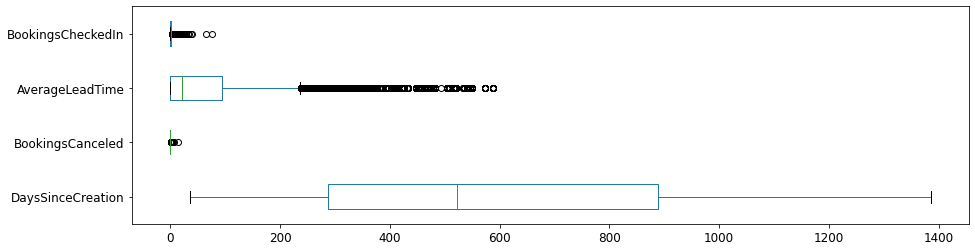

In [305]:
# plotting boxplots for selected numerical variables

df[['DaysSinceCreation', 'BookingsCanceled', 'AverageLeadTime', 'BookingsCheckedIn']].boxplot(grid=False, vert=False, fontsize=12, figsize=(15,4))
plt.show()

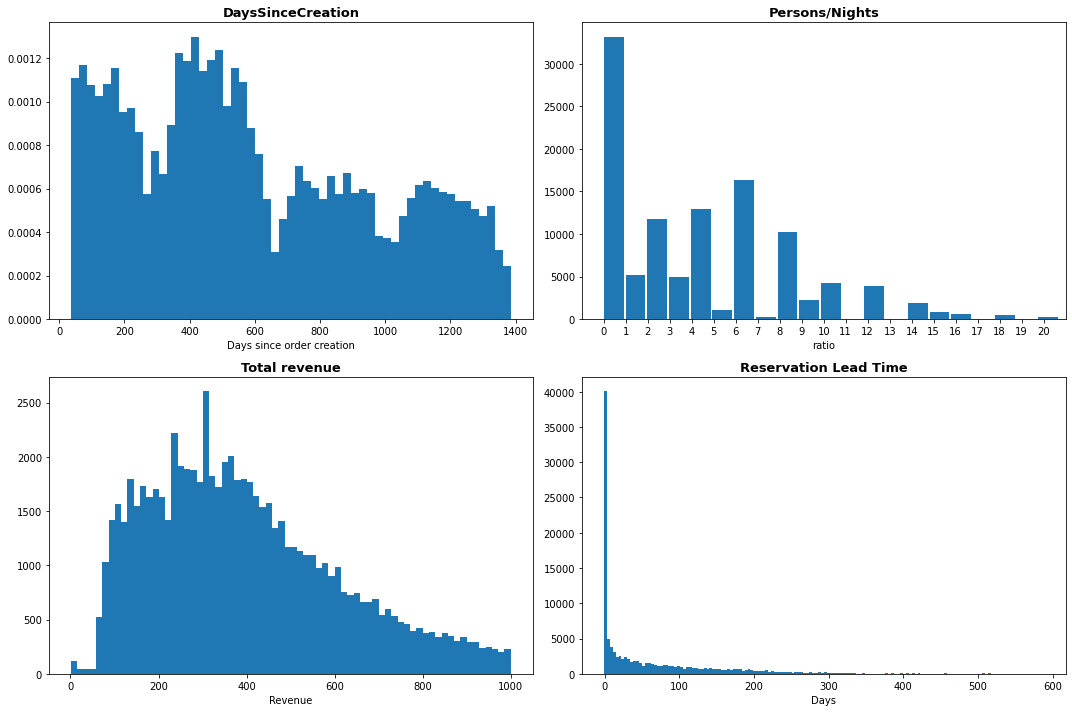

In [306]:
# plotting histograms for selected variables; we have adjusted the ranges and bin number for visualization purposes

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(15,10), dpi=72)

ax0.hist(df['DaysSinceCreation'], bins='auto', density=True)
ax0.set_title('DaysSinceCreation', fontsize=13, fontweight='bold')
ax0.set_xlabel('Days since order creation')

ax1.hist(df['PersonsNights'], bins='auto', range=(0,20), width=0.9)
ax1.set_xticks(range(0,21))
ax1.set_title('Persons/Nights', fontsize=13, fontweight='bold')
ax1.set_xlabel('ratio')

ax2.hist(df['total_revenue'], bins='auto', range=(1,1000))
ax2.set_title('Total revenue', fontsize=13, fontweight='bold')
ax2.set_xlabel('Revenue')

ax3.hist(df['AverageLeadTime'], bins='auto')
ax3.set_title('Reservation Lead Time', fontsize=13, fontweight='bold')
ax3.set_xlabel('Days')

plt.tight_layout()
plt.show()

<AxesSubplot:>

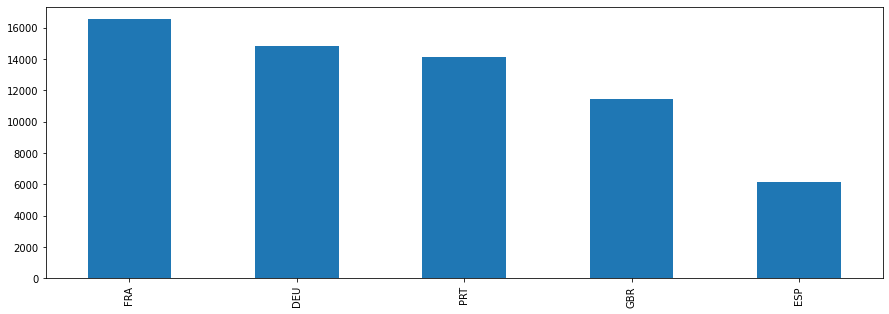

In [307]:
# let's see top customer markets

df['Nationality'].value_counts().head(5).plot.bar(figsize=(15,5))

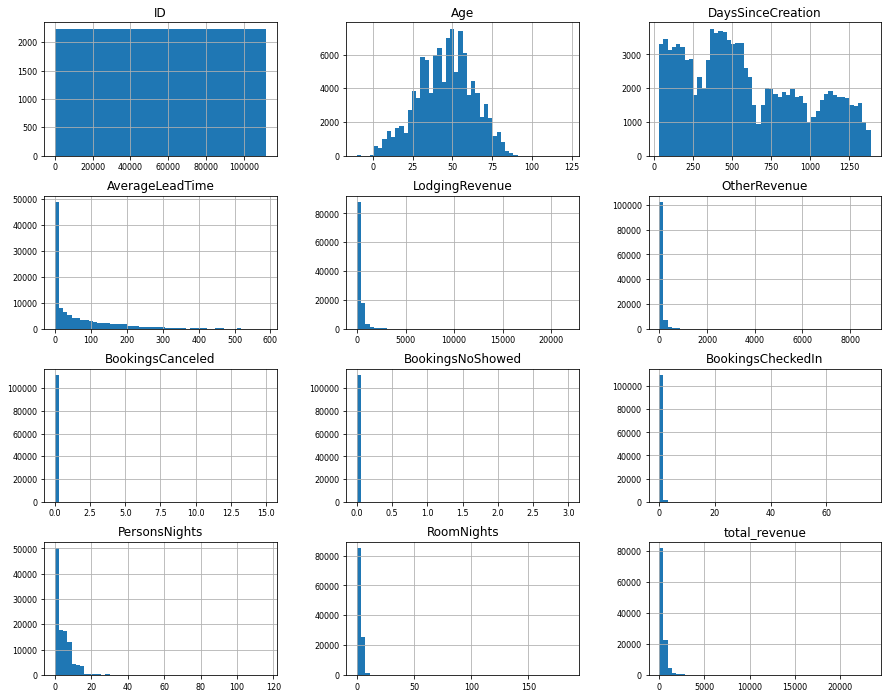

In [308]:
# plotting histograms on all numerical variables

numerical=df.select_dtypes(include=[np.number])
numerical = [col for col in numerical.columns if ('SR' not in col)]
n_col = 3
n_row = math.ceil(df[numerical].shape[1]/n_col)
df[numerical].hist(bins=50, figsize=(15, df[numerical].shape[1]), layout=(n_row, n_col), xlabelsize=8, ylabelsize=8);

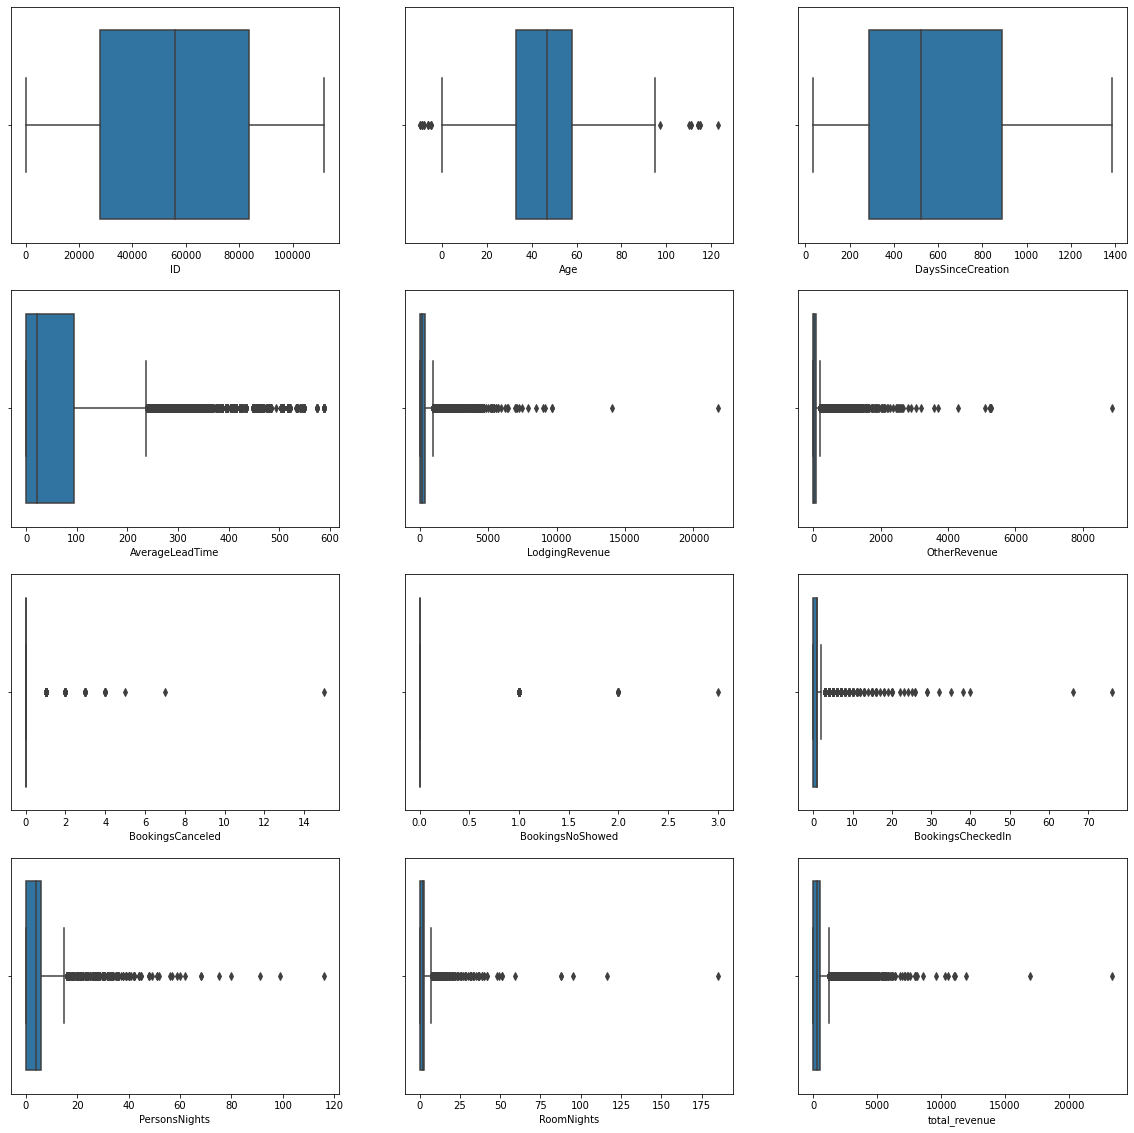

In [309]:
# showing boxplots on all numeric variables

fig, ax = plt.subplots(n_row, n_col, figsize=(20, 20))
for var, subplot in zip(df[numerical], ax.flatten()):
    sns.boxplot(x = df[var], ax=subplot)

Based on the conducted analysis we have decided data to undergo such changes:

- Ignore (maintain) the entries with missing DocIdHash;
- Mantain the single customer with no check-ins and revenue different from zero;
- Create a 'Special Requests marker' which represents whether the client ever made a request before;
- Perform outliers treatment using IQR or manually, if IQR doesn't work;
- Create two ratios: RoomNights/BookingsCheckedIn (average length of stay) and PersonNights/RoomNights (Room_dens);
- Remove customers with both Lodging and Other revenue equal to zero;
- Remove RoomNights and PersonNights;
- Mantain the entries with duplicate DocIdHashes, even with same NameHash;
- Try to fill de missing Age entries using a classifier. Drop them if a good accuracy is not achieved;
- Let the entries with Age below zero be classified as NaNs during the binning procedure;
- BookingsCanceled and BookingsNoShowed variables will be removed from the segmentation.

In [310]:
X = df.copy()

X_cols = [col for col in X.columns if 'SR' in col]
X['Requests'] = (X[X_cols]!= 0).any(axis=1).astype(int)

# creating variable to mark client as family client

X.rename(columns={'SRCrib': 'Family'},inplace=True)

# creating Group Size variable - 1 client will haze Nan value for group size, 
# will be set at zero this client is considered to be an exception

X['room_dens'] = X['PersonsNights'] / X['RoomNights']
X['room_dens'].fillna(0, inplace=True)

# creating length of stay variable - 1 client will haze Nan value for group size, 
# will be set at zero this client is considered to be an exception

X['avg_len_of_stay'] = X['RoomNights'] / X['BookingsCheckedIn']
X['avg_len_of_stay'].fillna(0, inplace=True)

In [311]:
cols = ['ID', 'Nationality', 'DaysSinceCreation', 'NameHash', 'DocIDHash']

X.drop(columns=cols, inplace=True)

In [312]:
# rescaling the revenue values using DaysSinceCreation, 
# as customers that are in the database for more time 
# will probably have higher revenue values

X['avg_lodging_revenue'] = X['LodgingRevenue'] / X['BookingsCheckedIn']
X['avg_other_revenue'] = X['OtherRevenue'] / X['BookingsCheckedIn']

#indexNames = X[X['BookingsCheckedIn']==0].index
#X.drop(indexNames, inplace=True)
X.reset_index(drop=True, inplace=True)

In [313]:
X.drop(columns=['LodgingRevenue', 'OtherRevenue', 'BookingsCheckedIn'], inplace=True)

In [314]:
# creating bins in LodgingRevenue and OtherRevenue
# transforming it into a categorical variable since the values 
# are scattered and we would like to work with a revenue scale

X['lod_rev_bins'] = pd.cut(x=X['avg_lodging_revenue'], 
                           bins=[-np.inf, 226.15, 399.00, np.inf], labels=['Lodging_C', 'Lodging_B', 'Lodging_A'])
X['oth_rev_bins'] = pd.cut(x=X['avg_other_revenue'], 
                           bins=[-np.inf, 36.00, 86.75, np.inf], labels=['Other_C', 'Other_B', 'Other_A'])

In [315]:
# dropping the average revenue  columns from the original dataframe (X)

X.drop(columns=['avg_lodging_revenue','avg_other_revenue'], inplace=True)

# Data Preparation fro Clustering

In [316]:
cat_cols_dummies = pd.get_dummies(X[['DistributionChannel', 'MarketSegment', 'age_group']])
cat_cols_dummies.head(3)

,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_GDS Systems,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator,age_group_0-20,age_group_21-40,age_group_41-60,age_group_60+,age_group_Unknown
0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0


In [317]:
to_concat = X.drop(['DistributionChannel', 'MarketSegment', 'Age', 'age_group', 'lod_rev_bins', 'oth_rev_bins'], axis=1)
data = pd.concat([to_concat, cat_cols_dummies], axis=1)
data.head(3)

,AverageLeadTime,BookingsCanceled,BookingsNoShowed,PersonsNights,RoomNights,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,...,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator,age_group_0-20,age_group_21-40,age_group_41-60,age_group_60+,age_group_Unknown
0,59,1,0,6,4,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,61,0,0,10,5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [319]:
# normalizing variables with MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

array([[0.10186757, 0.06666667, 0. , ..., 1. , 0. ,
 0. ],
 [0.10526316, 0. , 0. , ..., 0. , 0. ,
 1. ],
 [0.00169779, 0. , 0. , ..., 0. , 0. ,
 0. ],
 ...,
 [0.00169779, 0. , 0. , ..., 0. , 0. ,
 0. ],
 [0.11375212, 0. , 0. , ..., 1. , 0. ,
 0. ],
 [0.00169779, 0. , 0. , ..., 1. , 0. ,
 0. ]])

In [320]:
# dropping unnecessary columns

X.head()

,Age,AverageLeadTime,BookingsCanceled,BookingsNoShowed,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,...,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,total_revenue,age_group,Requests,room_dens,avg_len_of_stay,lod_rev_bins,oth_rev_bins
0,52.0,59,1,0,6,4,Corporate,Corporate,0,0,...,0,0,0,374.3,41-60,0,1.5,2.0,Lodging_C,Other_B
1,NaN,61,0,0,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,...,0,0,0,333.0,Unknown,0,2.0,5.0,Lodging_B,Other_B
2,32.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,...,0,0,0,0.0,21-40,0,0.0,0.0,NaN,NaN
3,61.0,93,0,0,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,...,0,0,0,300.0,60+,0,2.0,5.0,Lodging_B,Other_B
4,52.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,...,0,0,0,0.0,41-60,0,0.0,0.0,NaN,NaN


In [321]:
df_scaled = pd.DataFrame(data_scaled, columns=data.columns)
df_scaled.head()

,AverageLeadTime,BookingsCanceled,BookingsNoShowed,PersonsNights,RoomNights,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,...,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator,age_group_0-20,age_group_21-40,age_group_41-60,age_group_60+,age_group_Unknown
0,0.101868,0.066667,0.0,0.051724,0.021622,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.105263,0.000000,0.0,0.086207,0.027027,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.001698,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.159593,0.000000,0.0,0.086207,0.027027,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.001698,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [322]:
# final variables choice

df_final = df_scaled.drop(['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower',
                           'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
                           'SRQuietRoom'], axis=1)

# K-Means clustering

Let's apply one of the most popular clustering algorithms - K-means tries to group similar items in the form of clusters. 
The "Elbow Method" is one of the most popular methods to determine this optimal value of K. 
To determine the optimal number of clusters, we have to select the value of k at the “elbow” is the point after which the distortion (average of the squared distances from the cluster centers of the respective clusters) / inertia (sum of squared distances of samples to their closest cluster center) start decreasing in a linear fashion.

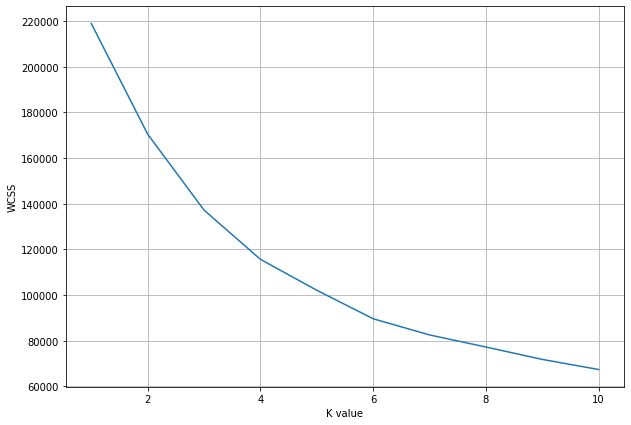

In [323]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_final)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 7))
plt.grid()
plt.plot(range(1, 11), wcss)
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

We see that the "elbow" point is for K=6 se we chose that value.

In [329]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_final)

KMeans(n_clusters=6)

In [330]:
labels = kmeans.labels_
df['Kmean-Labels'] = labels
df['Kmean-Labels'].value_counts()

4 35185
5 20268
3 16714
0 16244
2 11977
1 11345
Name: Kmean-Labels, dtype: int64

Let's also take a look at average values of original data grouped by labels:

In [333]:
kmeans_avg = df.groupby('Kmean-Labels').mean()
kmeans_avg

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,total_revenue
Kmean-Labels,,,,,,,,,,,,,,,,,,,,,
0,52243.826644,46.838735,646.597821,71.970328,236.789036,64.814404,0.003940,0.001231,0.823935,4.459739,...,0.001354,0.000369,0.009911,0.069256,0.058668,0.000123,0.000923,0.000000,0.006772,301.603440
1,49769.161833,55.123527,661.675981,96.169238,269.381793,68.648808,0.000264,0.000088,0.816307,3.545879,...,0.000176,0.000000,0.004407,0.233583,0.231027,0.000088,0.000705,0.000000,0.001939,338.030601
2,55069.831427,68.674042,605.328797,87.082575,291.102781,80.127161,0.001419,0.000334,0.761960,4.664357,...,0.002672,0.003507,0.002087,0.440177,0.299992,0.001002,0.004676,0.000000,0.137597,371.229942
3,60402.374596,42.480209,542.274022,39.583164,293.848371,64.217509,0.003590,0.000359,0.702525,4.019205,...,0.006641,0.004308,0.030154,0.216465,0.091121,0.000658,0.007000,0.000179,0.043018,358.065880
4,56542.734830,43.741501,584.591928,53.307063,298.607224,64.256449,0.002984,0.000966,0.688987,4.516470,...,0.002558,0.000966,0.014694,0.492653,0.155038,0.000256,0.004235,0.000284,0.145829,362.863674
5,57742.000444,31.706335,571.916321,47.205151,291.523731,54.354647,0.000296,0.000099,0.723308,4.390665,...,0.004589,0.001381,0.027186,0.522499,0.166568,0.000099,0.002812,0.000444,0.107115,345.878378


In [336]:
df.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,total_revenue,age_group,Kmean-Labels
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,...,0,0,0,0,0,0,0,374.3,41-60,0
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,333.0,Unknown,0
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0.0,21-40,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,300.0,60+,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0.0,41-60,0


Next, we use the silhouette score, which ranges from −1 to +1, where a value closer to 1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [337]:
round(silhouette_score(df_final, labels, metric='euclidean'), 4)

0.3729

As we see, the silhouette score is quite poor. It may depend on the different number of clusters.

Now that we have performed k-means clustering, we can analyze the resulting clusters and describe their behavior. Here's what we can say about each cluster:

**Cluster 0:** This cluster represents customers who are relatively young and have a high number of bookings. They tend to cancel or no-show their bookings more often than other customers, but also tend to spend more on lodging and other revenue. They have a relatively low number of person and room nights.

**Cluster 1**: This cluster represents customers who are relatively old and have been created for a longer time. They tend to book rooms with a higher lead time and are less likely to cancel or no-show their bookings. They also tend to spend more on lodging and other revenue, and have a relatively high number of person and room nights.

**Cluster 2:** This cluster represents customers who are relatively young and have been created for a shorter time. They tend to book rooms with a shorter lead time and have a relatively low amount of lodging and other revenue. They also tend to have a low number of person and room nights.

**Cluster 3:** This cluster represents customers who are relatively old and have a high number of bookings. They tend to cancel or no-show their bookings more often than other customers and have a relatively low amount of lodging and other revenue. They also have a relatively low number of person and room nights.

**Cluster 4:** This cluster represents customers who are relatively young and have a low number of bookings. They tend to book rooms with a shorter lead time and have a relatively low amount of lodging and other revenue. They also have a low number of person and room nights.

**Cluster 5:** This cluster represents customers who are relatively old and have a low number of bookings. They tend to book rooms with a longer lead time and have a relatively low amount of lodging and other revenue. They also have a relatively high number of person and room nights.

# PCA analysis

In [339]:
# exploring the most important variables with high explanatory power

pca = PCA(n_components= df_scaled.shape[1])
principalComponents = pca.fit_transform(df_scaled)

Text(0.5, 1.0, 'PC Analysis of numerical variables')

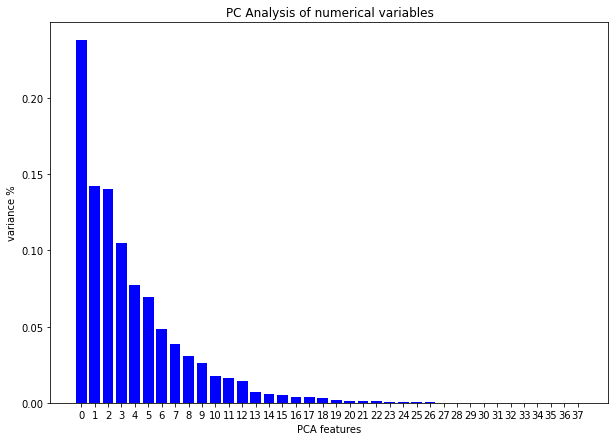

In [347]:
# plotting the explained variances

features=range(pca.n_components_)
fig, ax = plt.subplots(figsize=(10, 7))
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.title('PC Analysis of numerical variables')

In [354]:
# fitting the PCA algorithm to data 

pca = PCA().fit(data)

# showing the variance per component
# with 8 components we can explain 95% of variance

pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(data.columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pcaDF

,Component,Variance explained,Cumulative variance explained
0,1,0.968923,0.968923
1,2,0.030983,0.999905
2,3,0.000060,0.999966
3,4,0.000014,0.999979
4,5,0.000006,0.999986
5,6,0.000003,0.999988
6,7,0.000002,0.999991
7,8,0.000002,0.999992
8,9,0.000002,0.999994
9,10,0.000001,0.999995


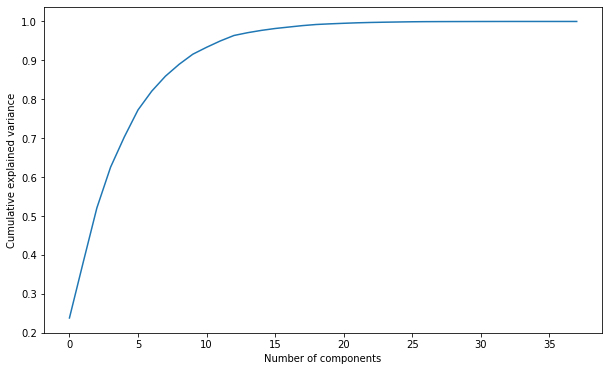

In [360]:
pca = PCA()
X_pca = pca.fit_transform(data_scaled)

# determining the number of principal components to retain based on explained variance

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

# based on the plot, we can see that retaining 10 principal components explains over 90% of the variance
# using the retained principal components as input features for further analysis

pca = PCA(n_components=10)
X_pca = pca.fit_transform(data_scaled)

After applying PCA, we have reduced the input features to 10 principal components that explain over 90% of the variance. These principal components can now be used as input features for further analysis, such as clustering or classification.